## Libear Regression & Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [2]:
whitedata = pd.read_csv("white.csv")   # dataframe
whitedata.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
y      0
dtype: int64

In [3]:
whitedata.head()  # whitedata.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Linear Regression 

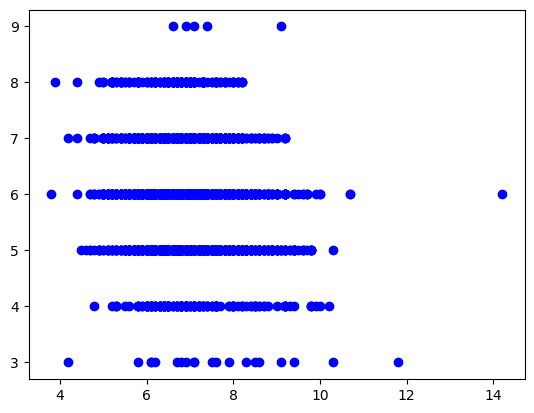

In [4]:
y = whitedata.y  # whitedata["y"]
x = whitedata.x1
plt.scatter(x,y,color="blue"); plt.show()       # 산점도

In [5]:
x = whitedata["x1"].to_frame()
y = whitedata.y

In [6]:
slm = LinearRegression().fit(x,y)        
w, b = slm.coef_[0], slm.intercept_
print(w,b)

-0.1192889886319587 6.695610039009974


In [7]:
x0, x1 = x["x1"].min(), x["x1"].max()
print(x0, x1)

3.8 14.2


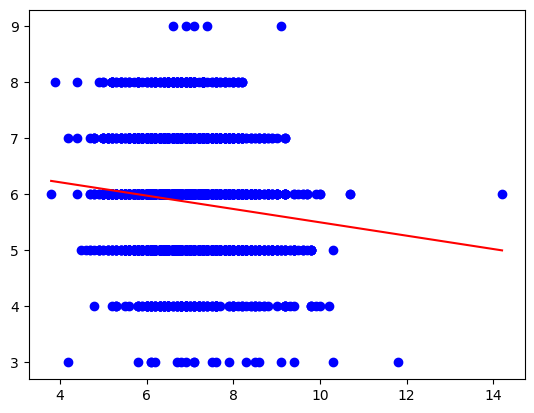

In [8]:
plt.scatter(x,y,color="blue")
plt.plot([x0,x1],[w*x0+b,w*x1+b],'r'); plt.show()

In [9]:
model = sm.OLS(y, sm.add_constant(x))   # sm.OLS(y,x)와 비교
results = model.fit()   # sm.OLS(y, sm.add_constant(x)).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     64.08
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.48e-15
Time:                        15:03:24   Log-Likelihood:                -6322.8
No. Observations:                4898   AIC:                         1.265e+04
Df Residuals:                    4896   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6956      0.103     65.057      0.0

In [10]:
## Multiple linear regression
X = whitedata.drop(["y"],axis=1)
y = whitedata["y"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
lrm = LinearRegression(n_jobs=-1)      # fit_intercept=True
result = lrm.fit(X_train, y_train)
print(result.coef_)

[ 8.00846101e-02 -1.70374343e+00  5.69767648e-02  8.17351234e-02
 -1.64381383e-02  4.96141486e-03 -4.74149230e-04 -1.48223181e+02
  7.49786197e-01  7.33900620e-01  2.08766177e-01]


In [13]:
print(result.feature_names_in_)

['x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11']


In [14]:
forecast = lrm.predict(X_test)
print(forecast[0:10])

[6.13867211 4.87485387 5.80282258 6.02253147 6.30505131 6.55048122
 5.98089896 6.06284824 5.56466996 5.94534116]


In [15]:
accuracy = lrm.score(X_test, y_test)    # 결정계수
print(accuracy)

0.24803962262650736


In [16]:
model = sm.OLS(y_train, sm.add_constant(X_train))   # sm.OLS(y,x)와 비교
results = model.fit()   # sm.OLS(y, sm.add_constant(x)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     129.1
Date:                Mon, 22 May 2023   Prob (F-statistic):          3.70e-248
Time:                        15:03:24   Log-Likelihood:                -3878.0
No. Observations:                3428   AIC:                             7780.
Df Residuals:                    3416   BIC:                             7854.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.5394     21.311      6.923      0.0

### LASSO, Ridge regression

- Elastic net
$$ \min_{\beta \in R^p} \left\{ ||y- X \beta||_2^2 + \lambda_1 ||\beta||_1 + \lambda_2 ||\beta||_2^2 \right\} $$
- Lasso : $\lambda_2 = 0$
- Ridge : $\lambda_1 = 0$

In [17]:
from sklearn.linear_model import Lasso, Ridge

In [18]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)  # alpha=0: OLS

In [19]:
lasso.fit(X_train, y_train)
print(lasso.intercept_ , lasso.coef_ )

3.1350119050228873 [-0.         -0.          0.          0.00658765 -0.          0.00931903
 -0.0026721  -0.          0.          0.          0.26000292]


In [20]:
forecast = lasso.predict(X_test)
print(forecast[0:10])

[5.98542298 5.39795764 5.75828732 5.94075017 6.3486235  6.35493312
 5.74667097 6.083002   5.67070478 5.79674228]


In [21]:
## training-validation procedure(반복 with train-test-split)
from sklearn.metrics import mean_squared_error

result = np.zeros((10,5))
a = [0.001, 0.002, 0.003, 0.004, 0.005]
for step in range(10):
    X0, X1, y0, y1 = train_test_split(X, y, test_size=0.3)
    for choice in range(len(a)):
        lasso = Lasso(alpha=a[choice])      # sklearn.preprocessing.StandardScaler
        lasso.fit(X0, y0); forecast = lasso.predict(X1)
        result[step,choice] = mean_squared_error(y1,forecast)
print(result)

[[0.55654338 0.55754247 0.55895592 0.56078362 0.56287797]
 [0.61139232 0.61249228 0.6140055  0.61593186 0.6182691 ]
 [0.58296263 0.58362729 0.5847119  0.58621639 0.58799306]
 [0.55206037 0.55356372 0.55552747 0.55782555 0.56025438]
 [0.56305668 0.56489902 0.5671934  0.56993981 0.57313065]
 [0.5373921  0.53742798 0.53775101 0.53813259 0.53889269]
 [0.53446593 0.53528381 0.53650822 0.53813912 0.54014986]
 [0.55256412 0.55258589 0.55297556 0.55373315 0.55454691]
 [0.56251776 0.56363335 0.56519428 0.56697298 0.56896089]
 [0.60054967 0.60002101 0.59996607 0.60038494 0.60097645]]


In [22]:
result = pd.DataFrame(result)
result.mean()

0    0.565350
1    0.566108
2    0.567279
3    0.568806
4    0.570605
dtype: float64

### Logistic Regression

In [23]:
whitedata["good"] = (whitedata.y > 5).astype(float)

y_binary = whitedata["good"]
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=100)

In [53]:
whitedata

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y,good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1.0


In [24]:
# statmodels
logit_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.508625
         Iterations 8


In [25]:
print(logit_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                   good   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3416
Method:                           MLE   Df Model:                           11
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.2100
Time:                        15:03:25   Log-Likelihood:                -1743.6
converged:                       True   LL-Null:                       -2206.9
Covariance Type:            nonrobust   LLR p-value:                1.101e-191
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.1746     77.031      2.625      0.009      51.196     353.153
x1             0.0022      0.083      0.026      0.979      -0.160       0.164
x2            -5.8583      0.487    -12.033      0.0

In [26]:
print("Parameters:",logit_sm.params)
print("Eta:", logit_sm.fittedvalues[0:10])

Parameters: const    202.174579
x1         0.002172
x2        -5.858328
x3         0.164871
x4         0.149811
x5         0.985393
x6         0.011172
x7        -0.002212
x8      -215.010948
x9         1.034857
x10        2.381093
x11        0.801961
dtype: float64
Eta: 1044    1.135539
3224    2.072523
2808   -0.131601
3382    2.380944
295    -0.762854
728     1.427865
4772   -0.486029
4053   -0.015095
361    -1.930199
1466    1.976535
dtype: float64


In [27]:
muhat = logit_sm.predict(sm.add_constant(X_test))
print("prob:", muhat[0:10])

prob: 828     0.871299
1621    0.131395
3091    0.633535
2010    0.793015
1433    0.876213
1101    0.943365
3349    0.782047
2262    0.800305
4600    0.524013
1318    0.772940
dtype: float64


In [28]:
yhat = (muhat > 0.5).astype(int)
print(yhat[0:10])

828     1
1621    0
3091    1
2010    1
1433    1
1101    1
3349    1
2262    1
4600    1
1318    1
dtype: int32


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, yhat) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[238 222]
 [151 859]]


In [30]:
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, yhat))

Test accuracy =  0.7462585034013606


In [55]:
## 변수지정
import statsmodels.formula.api as smf
model = "good ~ x2+x4+x6++x8+x9+x10+x11"
logit_smf = smf.logit(formula=str(model),data=whitedata).fit()
logit_smf.summary()

Optimization terminated successfully.
         Current function value: 0.503737
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   good   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4890
Method:                           MLE   Df Model:                            7
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.2099
Time:                        15:22:23   Log-Likelihood:                -2467.3
converged:                       True   LL-Null:                       -3122.7
Covariance Type:            nonrobust   LLR p-value:                7.668e-279
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    239.0020     44.356      5.388      0.000     152.065     325.939
x2            -6.5823      0.397    -16.593      0.000      -7.360      -5.805
x4             0.1611      0.018      8.976      0.000       0.126       0.196
x6             0.0079      0.002      3.531      0.000       0.003       0.012
x8          -250.9899     44.429     -5.649      0.000    -338.069    -163.911
x9             0.9292      0.253      3.675      0.000       0.434       1.425
x10            1.7212      0.350      4.913      0.000       1.035       2.408
x11            0.7730      0.067     11.527      0.000       0.642       0.904
==============================================================================
"""

In [32]:
#sklearn : “statsmodels”과 다른 설정

from sklearn.linear_model import LogisticRegression

In [33]:
logitS = LogisticRegression(penalty=None)  ## C=1/alpha=1, penality="l2" {"l1","l2","elasticnet",None}
logitS.fit(X_train, y_train)    

C:\Users\SM-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [34]:
print(logitS.coef_, logitS.intercept_)      

[[-2.65420102e-01 -6.60264109e+00 -4.50129172e-01  6.12026995e-02
  -5.53446455e-01  1.11728591e-02 -2.73227133e-03 -2.40636507e+00
  -7.43561172e-01  2.20721866e+00  9.87457642e-01]] [-2.41440867]


#### The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
- 'lbfgs' - ['l2', None]
- 'liblinear' - ['l1', 'l2']
- 'newton-cg' - ['l2', None]
- 'newton-cholesky' - ['l2', None]
- 'sag' - ['l2', None]
- 'saga' - ['elasticnet', 'l1', 'l2', None]

In [40]:
logitL = LogisticRegression(penalty="l1",solver="saga")  # LASSO , C = 1/alpha    
logitL.fit(X_train, y_train)   

C:\Users\SM-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [41]:
muL = logitL.predict_proba(X_test)
yhat = logitL.predict(X_test)
print(muL[0:10])
print(yhat[0:10])

[[0.24486554 0.75513446]
 [0.58455693 0.41544307]
 [0.3685746  0.6314254 ]
 [0.25657334 0.74342666]
 [0.16572461 0.83427539]
 [0.13913014 0.86086986]
 [0.28383324 0.71616676]
 [0.23961254 0.76038746]
 [0.42761097 0.57238903]
 [0.26209162 0.73790838]]
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


In [42]:
logitL.score(X_test, y_test)  

0.6843537414965987

### 다범주 로짓 모형

In [98]:
from sklearn import datasets   
# iris data
iris = datasets.load_iris()
X = iris.data[:, 0:2]
Y = iris.target

In [99]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [100]:
from statsmodels.discrete.discrete_model import MNLogit

In [101]:
mlogit_sm = MNLogit(Y,sm.add_constant(X)).fit(maxiter=100,method="bfgs")
mlogit_sm.summary()

Optimization terminated successfully.
         Current function value: 0.367753
         Iterations: 76
         Function evaluations: 79
         Gradient evaluations: 79


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      144
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.6653
Time:                        16:19:52   Log-Likelihood:                -55.163
converged:                       True   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 2.708e-46
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -450.5300   2.15e+05     -0.002      0.998   -4.22e+05    4.21e+05
x1           151.9857   6.33e+04      0.002      0.998   -1.24e+05    1.24e+05
x2          -113.7996   3.79e+04     -0.003      0.998   -7.44e+04    7.42e+04
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -463.5753   2.15e+05     -0.002      0.998   -4.22e+05    4.21e+05
x1           153.8879   6.33e+04      0.002      0.998   -1.24e+05    1.24e+05
x2          -113.3949   3.79e+04     -0.003      0.998   -7.44e+04    7.42e+04
==============================================================================
"""

In [102]:
prob = mlogit_sm.predict(sm.add_constant(X))
print(prob)

[[1.00000000e+000 9.81333892e-033 1.42800007e-033]
 [1.00000000e+000 3.17519120e-021 2.57977662e-022]
 [1.00000000e+000 2.60590487e-044 1.56924803e-045]
 [1.00000000e+000 5.72212068e-046 2.73591042e-047]
 [1.00000000e+000 2.81132553e-044 3.52194827e-045]
 [1.00000000e+000 1.05869138e-032 3.20493784e-033]
 [1.00000000e+000 8.52708982e-061 4.60329244e-062]
 [1.00000000e+000 2.15484111e-034 2.48965123e-035]
 [1.00000000e+000 2.75901411e-049 8.31615241e-051]
 [1.00000000e+000 3.62675171e-026 3.06834602e-027]
 [1.00000000e+000 8.11471913e-023 2.26555781e-023]
 [1.00000000e+000 1.35552660e-047 1.07054158e-048]
 [1.00000000e+000 7.96372544e-028 5.34951755e-029]
 [1.00000000e+000 7.90402418e-061 2.05105442e-062]
 [1.00000000e+000 3.05584789e-011 2.06163504e-011]
 [1.00000000e+000 1.30457753e-037 8.55526020e-038]
 [1.00000000e+000 1.05869138e-032 3.20493784e-033]
 [1.00000000e+000 9.81333892e-033 1.42800007e-033]
 [9.99999911e-001 5.87465283e-008 3.02203716e-008]
 [1.00000000e+000 1.46238129e-0

In [103]:
yhat = np.argmax(prob,1)
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


### LASSO with statsmodels

In [104]:
mlogit_sm = MNLogit(Y,sm.add_constant(X))
mlogit_smL = mlogit_sm.fit_regularized(method="l1", alpha=0.5)
mlogit_smL.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5298536248758988
            Iterations: 60
            Function evaluations: 61
            Gradient evaluations: 60


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      145
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.6105
Time:                        16:19:53   Log-Likelihood:                -64.191
converged:                       True   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 2.320e-43
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0        nan        nan        nan         nan         nan
x1             3.6876      0.681      5.417      0.000       2.353       5.022
x2            -6.4977      1.193     -5.445      0.000      -8.837      -4.159
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3080      2.586     -3.599      0.000     -14.377      -4.239
x1             4.9952      0.773      6.460      0.000       3.480       6.511
x2            -6.0856      1.363     -4.464      0.000      -8.758      -3.413
==============================================================================
"""

In [105]:
yhatL = np.argmax(mlogit_smL.predict(sm.add_constant(X)),1)
print(yhatL)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [106]:
# Sklearn
mlogitR = LogisticRegression(C=1e5)  # multi_class="auto" {'ovr','multinomial','auto'}  
mlogitR.fit(X,Y)

LogisticRegression(C=100000.0)

In [107]:
muR = mlogitR.predict_proba(X)
yhatR = np.argmax(muR,1)
print(muR[0:10])
print(yhatR[0:10])

[[1.00000000e+00 1.31551595e-13 1.91419886e-14]
 [9.99999965e-01 3.24521189e-08 2.63646594e-09]
 [1.00000000e+00 6.61527282e-17 3.98332517e-18]
 [1.00000000e+00 3.15405544e-17 1.50790901e-18]
 [1.00000000e+00 5.93948049e-18 7.44044384e-19]
 [1.00000000e+00 1.18112760e-14 3.57552761e-15]
 [1.00000000e+00 2.90646764e-23 1.56891262e-24]
 [1.00000000e+00 6.27216797e-14 7.24630197e-15]
 [1.00000000e+00 7.16988928e-18 2.16089610e-19]
 [1.00000000e+00 3.15797337e-10 2.67155050e-11]]
[0 0 0 0 0 0 0 0 0 0]


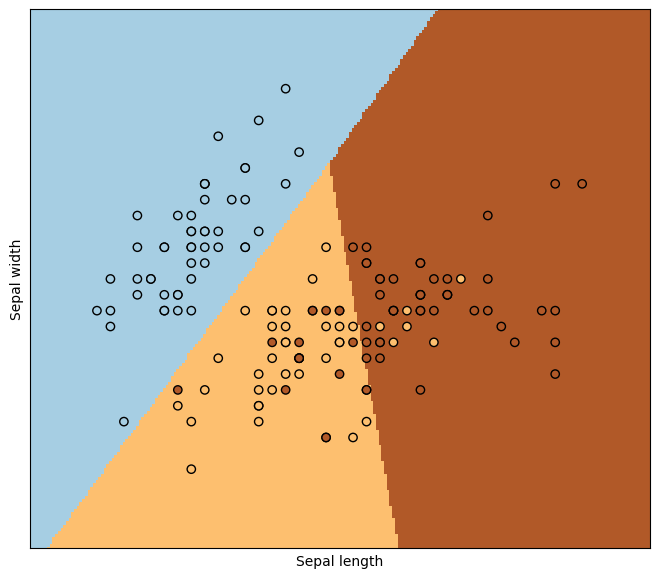

In [108]:
## 그림으로 표시
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = mlogitR.predict(np.c_[xx.ravel(), yy.ravel()])
# put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length'); plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max());  plt.ylim(yy.min(), yy.max())
plt.xticks(()); plt.yticks(())
plt.show()